<a href="https://colab.research.google.com/github/shiv9thakur/CIFAR-10/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10

This is an attempt to apply image classification on cifar-10 dataset using CNN with tensorflow.

## Importing data and Necessary library

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

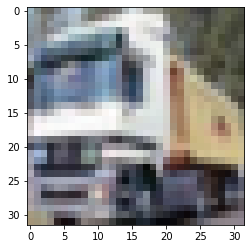

In [ ]:
plt.imshow(X_train[1])

## Data cleaning

In [ ]:
y_train = y_train.reshape(-1,) #Changing to 1d array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

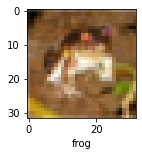

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
#Normalizing
X_train = X_train / 255
X_test = X_test / 255

## Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', # We use sparse_categorical_crossentropy when y = value and not one hot encoded
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8116 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.6263 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5418 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4823 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4340 - accuracy: 0.4954


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4622 - accuracy: 0.4815


[1.462199091911316, 0.4814999997615814]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: ", classification_report(y_test, y_pred_classes))

Classification Report:                precision    recall  f1-score   support

           0       0.51      0.55      0.53      1000
           1       0.47      0.77      0.59      1000
           2       0.42      0.29      0.34      1000
           3       0.36      0.34      0.35      1000
           4       0.42      0.42      0.42      1000
           5       0.46      0.30      0.36      1000
           6       0.55      0.52      0.53      1000
           7       0.55      0.57      0.56      1000
           8       0.47      0.74      0.58      1000
           9       0.67      0.33      0.44      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



## Building a CNN to perform the image classification

In [ ]:
cnn = models.Sequential([
        #CNN
        layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape = (32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape = (32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
          
        #Dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])


In [ ]:
cnn.compile(optimizer= 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5120 - accuracy: 0.4531
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1662 - accuracy: 0.5911
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0360 - accuracy: 0.6376
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9548 - accuracy: 0.6663
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8924 - accuracy: 0.6897
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8427 - accuracy: 0.7051
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7945 - accuracy: 0.7217
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7564 - accuracy: 0.7360
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7191 - accuracy: 0.7488
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9420 - accuracy: 0.6835


[0.9420022368431091, 0.6834999918937683]

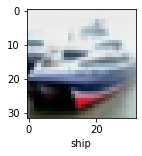

In [ ]:
y_test = y_test.reshape(-1, )
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.40163945e-04, 1.51293225e-05, 3.75815458e-03, 5.93814909e-01,
        2.64339126e-03, 1.93781883e-01, 2.04644650e-01, 6.09474257e-04,
        1.73268490e-04, 1.19049015e-04],
       [1.21636223e-03, 9.25625712e-02, 2.80494334e-07, 1.96270253e-06,
        8.90740708e-08, 2.46686849e-08, 8.09151359e-08, 9.49962065e-09,
        9.04714108e-01, 1.50452356e-03],
       [2.26359926e-02, 7.83090413e-01, 1.20510126e-03, 3.07305367e-03,
        4.77311376e-04, 5.13749546e-04, 8.74672900e-04, 1.47778599e-03,
        1.64255381e-01, 2.23965757e-02],
       [6.99805975e-01, 2.14952175e-02, 6.65357485e-02, 2.82193045e-03,
        7.57457642e-03, 3.72524111e-04, 2.10241321e-03, 1.30771135e-04,
        1.97461396e-01, 1.69936439e-03],
       [2.76396099e-06, 1.37329550e-06, 6.45055156e-03, 1.22824321e-02,
        8.78442466e-01, 1.38412463e-02, 8.89067277e-02, 7.06255669e-05,
        1.80943209e-06, 9.13719873e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
print("Classification Report: ", y_classes)

NameError: ignored